# Импорт библиотек

In [127]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
import seaborn as sns
import numpy as np
import warnings
from scipy.stats import mannwhitneyu, spearmanr
from scipy.stats import ttest_ind
from random import shuffle, randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

warnings.simplefilter(action='ignore', category=FutureWarning)


sns.set(style="white", color_codes=True)
sns.set(rc={'figure.figsize':(8,8)})

# Предварительный анализ

### Чтение данных

In [128]:
data = pd.read_csv('medics_1.csv', sep=',', decimal=',', skipinitialspace=True)
data = data.dropna()

### Типы данных

In [129]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 199
Data columns (total 67 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Развитие ОПП                 157 non-null    object 
 1   ХБП                          157 non-null    object 
 2   Возраст,                     157 non-null    int64  
 3   Пол                          157 non-null    int64  
 4   ГБ,                          157 non-null    int64  
 5   Сахарный диабет              157 non-null    int64  
 6   Стенокардия,                 157 non-null    int64  
 7   Инфаркт миокарда             157 non-null    int64  
 8   Мерцательная аритмия         157 non-null    int64  
 9   Желудочковая экстрасистолия  157 non-null    int64  
 10  А-В блокада                  157 non-null    int64  
 11  Блокада ножек пучка Гиса     157 non-null    int64  
 12  САД,                         157 non-null    int64  
 13  ДАД,                     

In [130]:
data.loc[data['ЧСС'] == '7o', 'ЧСС'] = 70
data['ЧСС'] = data['ЧСС'].astype('int64')
data['РН'] = data['РН'].apply(lambda x: str(x).replace(',', '.'))
data['РН'] = data['РН'].astype('float')

### Размер

In [131]:
data.shape

(157, 67)

In [132]:
data = data.drop_duplicates().reset_index(drop=True)

### Изминение названий стоблцов

In [133]:
data.columns = data.columns.str.replace(',', '')
a  = ['Стенокардия','Мерцательная аритмия', 'Желудочковая экстрасистолия', 'А-В блокада',
      'Блокада ножек пучка Гиса', 'Интервал Q-T', 'Масса миокарда ЛЖ',
      'АЧТВ', 'Давл. в ЛА', 'УО', 'МО', 'КДО мл', 
      'КСО', 'КДР правого желудочка','Размер левого предсердия']

data = data.drop(a, axis=1)

### Названия столбцов

In [134]:
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.columns.sort_values()

Index(['qrs', 'аик', 'алат', 'ар', 'асат', 'ве', 'возраст',
       'время_пережатия_аорты', 'гб', 'гемоглобин', 'дад', 'дд_лж_см',
       'диурез', 'длительность_аик', 'длительность_операции', 'имт',
       'инфаркт_миокарда', 'калий', 'кальций', 'количество_шунтов',
       'креатинин_крови', 'лейкоциты_крови', 'лпнп', 'лпонп', 'мочевина_',
       'натрий', 'нк', 'нсо3', 'общ.со2', 'общий_белок',
       'объем_гемотрансфузии', 'объем_инфузий', 'объем_кровопотерии',
       'оксигем.', 'пол', 'развитие_опп', 'рн', 'ро2', 'рсо2', 'сад',
       'сахарный_диабет', 'сд_лж_см', 'скф_расч.', 'толщина_паренхимы_почек',
       'триглицериды', 'тромбоциты', 'фракция_изгнания', 'хбп', 'хлориды',
       'холестерин', 'хсн', 'чсс'],
      dtype='object')

### Формирование сэмплов по больным

In [135]:
sick = data.loc[data['развитие_опп'] == 'есть']
no_sick = data.loc[data['развитие_опп'] == 'нет']

In [136]:
len(sick), len(no_sick)

(99, 58)

# Обработка выбрасов

Text(0.5, 1.0, 'Boxplot ЧСС')

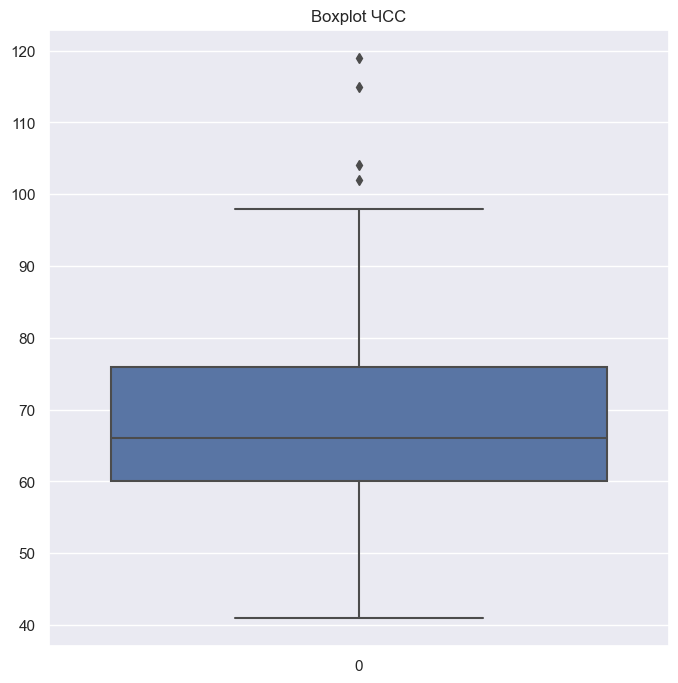

In [137]:
data = data.loc[data['чсс'] < 200]
sns.boxplot(data=data['чсс'])
plt.title('Boxplot ЧСС')

Text(0.5, 1.0, 'Boxplot ЧСС')

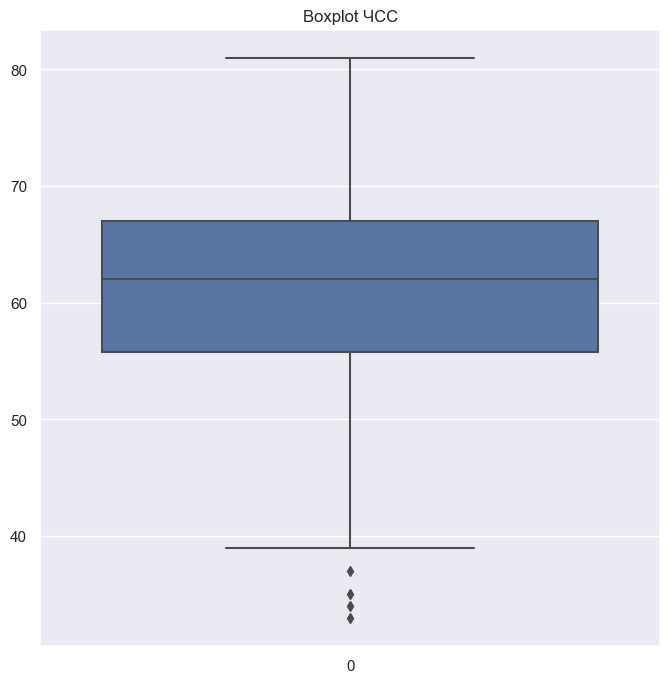

In [138]:
sns.boxplot(data=data['фракция_изгнания'])
plt.title('Boxplot ЧСС')

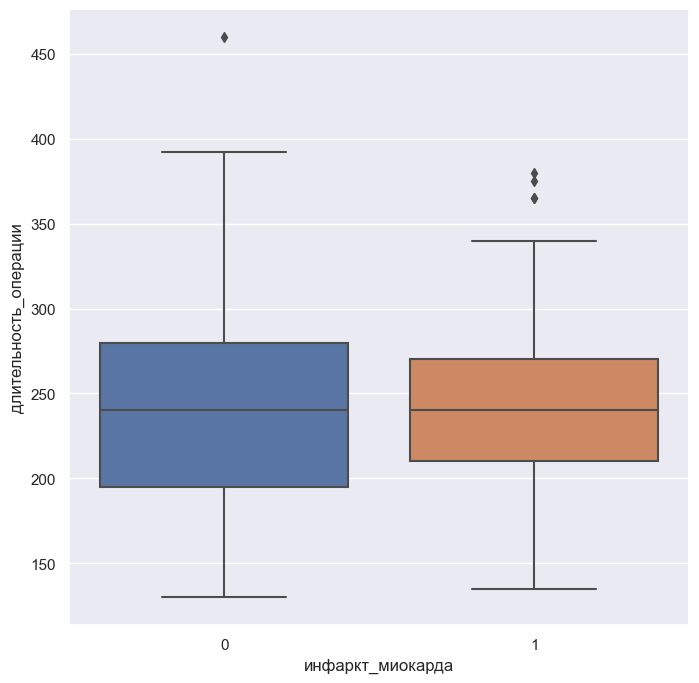

In [139]:
sns.boxplot(x='инфаркт_миокарда', y='длительность_операции', data=data)
plt.show()

<Axes: >

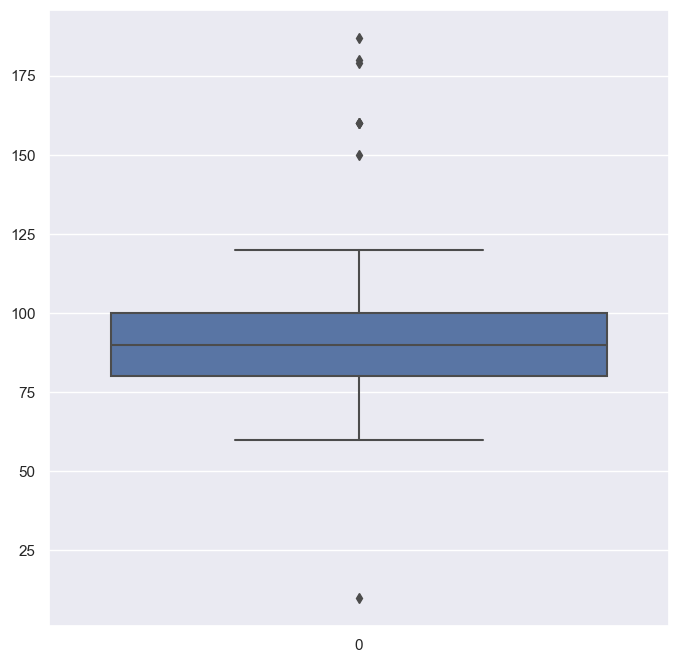

In [140]:
sns.boxplot(data=data['qrs'])

# Общий анализ

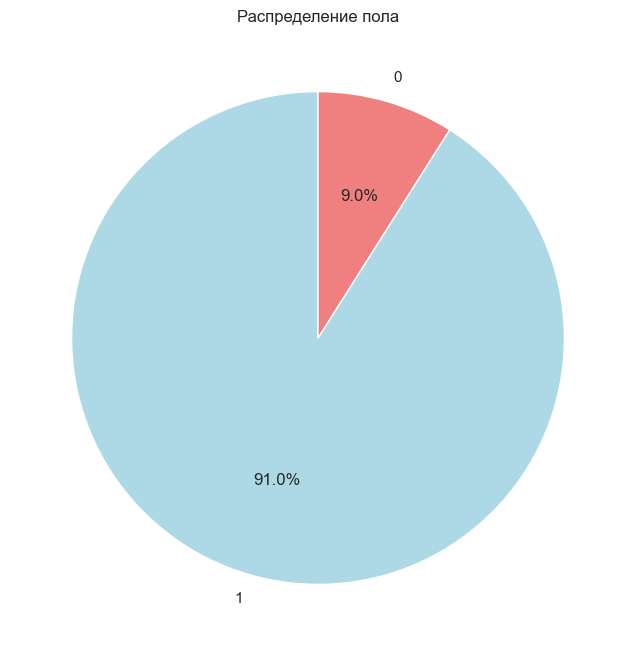

In [141]:
gender_counts = data['пол'].value_counts()

plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90, colors=['lightblue', 'lightcoral'])
plt.title('Распределение пола')
plt.show()

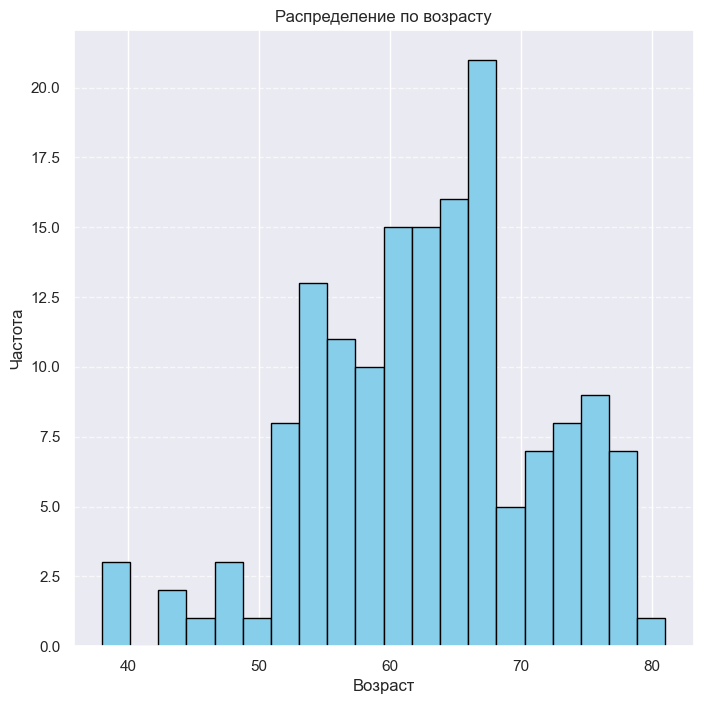

In [142]:
plt.hist(data['возраст'], bins=20, color='skyblue', edgecolor='black')
plt.title('Распределение по возрасту')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<Axes: xlabel='возраст', ylabel='длительность_операции'>

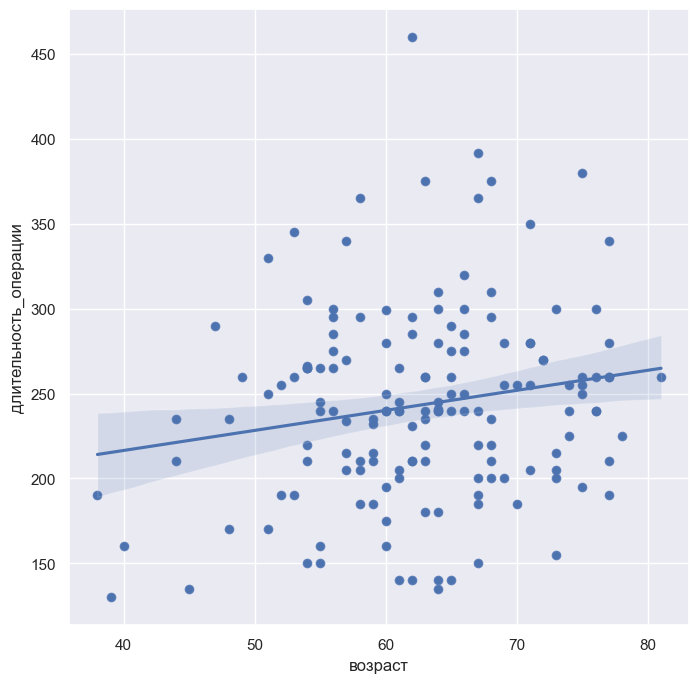

In [143]:
sns.scatterplot(data=data, x="возраст", y="длительность_операции")
sns.regplot(x=data['возраст'], y=data['длительность_операции'])

<Axes: xlabel='возраст', ylabel='имт'>

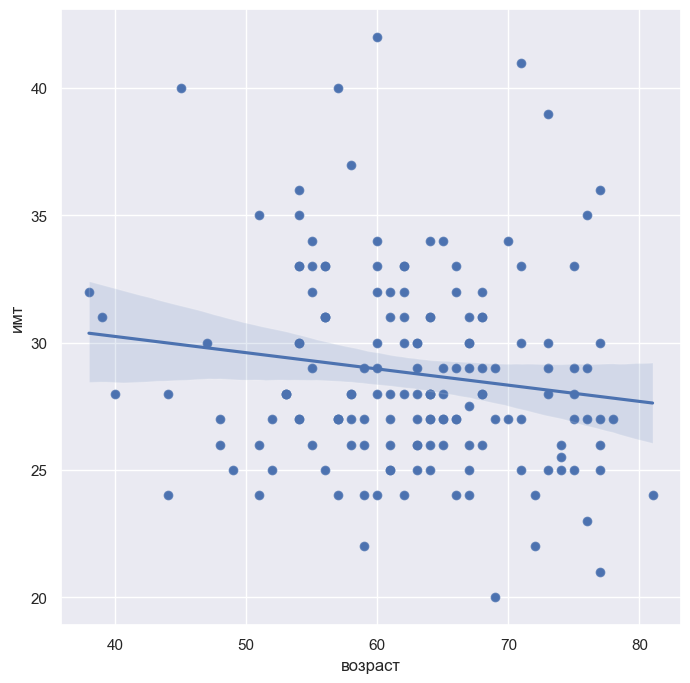

In [144]:
sns.scatterplot(data=data, x="возраст", y="имт")
sns.regplot(x=data['возраст'], y=data['имт'])

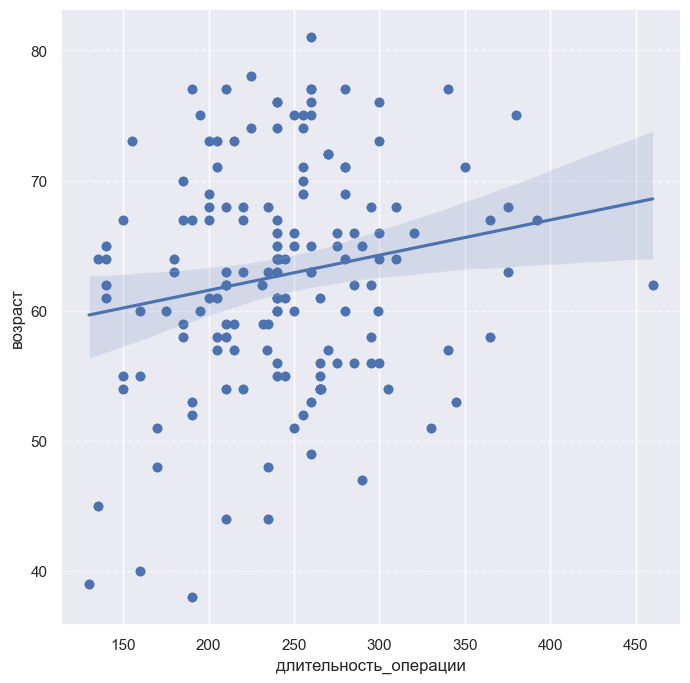

In [145]:
plt.scatter(data['длительность_операции'], data['возраст'])
sns.regplot(x=data['длительность_операции'], y=data['возраст'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Считаем метрики

In [146]:
print(sick['сахарный_диабет'].value_counts(), sick['гб'].value_counts(), sick['хбп'].value_counts())
print()
print(no_sick['сахарный_диабет'].value_counts(), no_sick['гб'].value_counts(), no_sick['хбп'].value_counts())

сахарный_диабет
0    63
1    36
Name: count, dtype: int64 гб
1    88
0    11
Name: count, dtype: int64 хбп
Стадия C1-C2        45
Пациенты без ХБП    45
Стадия С3            9
Name: count, dtype: int64

сахарный_диабет
0    42
1    16
Name: count, dtype: int64 гб
1    55
0     3
Name: count, dtype: int64 хбп
Стадия C1-C2        28
Пациенты без ХБП    28
Стадия С3            2
Name: count, dtype: int64


### Перестановочный тест

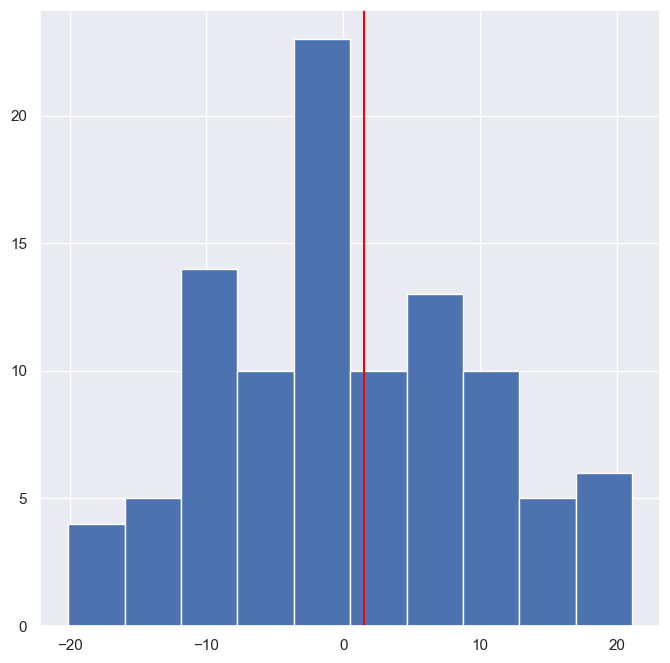

In [147]:
import numpy as np
from random import shuffle
import matplotlib.pyplot as plt
import pandas as pd
from random import randint


a = data.loc[data['инфаркт_миокарда'] == 0]['длительность_операции']
b = data.loc[data['инфаркт_миокарда'] == 1]['длительность_операции']


def statictic(a, b):
    return np.median(a) - np.median(b)


def naive_perm_test(a, b, n_iters=100):
    stats = []

    for i in range(n_iters):
        x = a[:] + b[:]
        shuffle(x)
        a_new = x[:len(a)]
        b_new = x[len(a):]
        if len(a_new) != 0 and len(b_new) != 0:
            v = (sum(a_new) / len(a_new)) - (sum(b_new) / len(b_new))
            stats.append(v)

    return stats


a = a.values.tolist()
b = b.values.tolist()
w = naive_perm_test(a, b)
pvalue = (sum(a) / len(a)) - (sum(b) / len(b))
_ = plt.hist(w)
plt.axvline(pvalue, color='red')
plt.show()

### Поиск корреляций

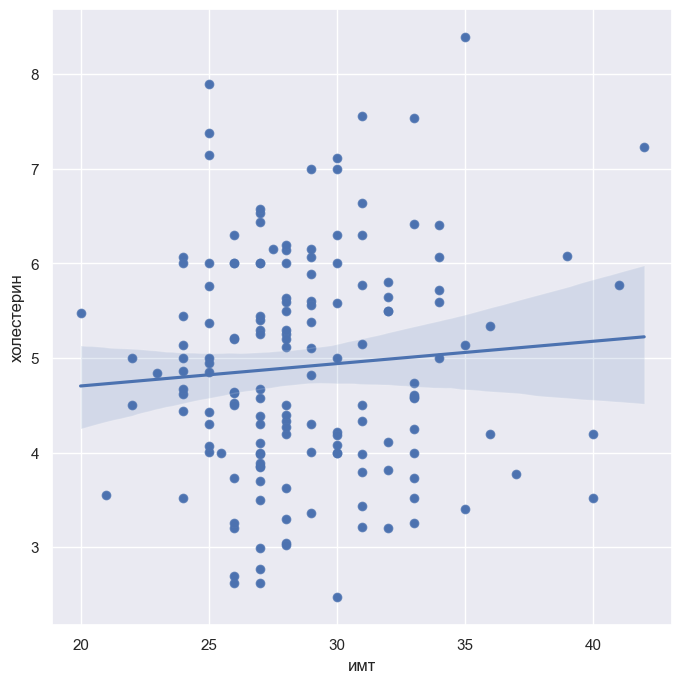

In [148]:
sns.scatterplot(x='имт', y='холестерин', data=data)
sns.regplot(x='имт', y='холестерин', data=data)
plt.show()

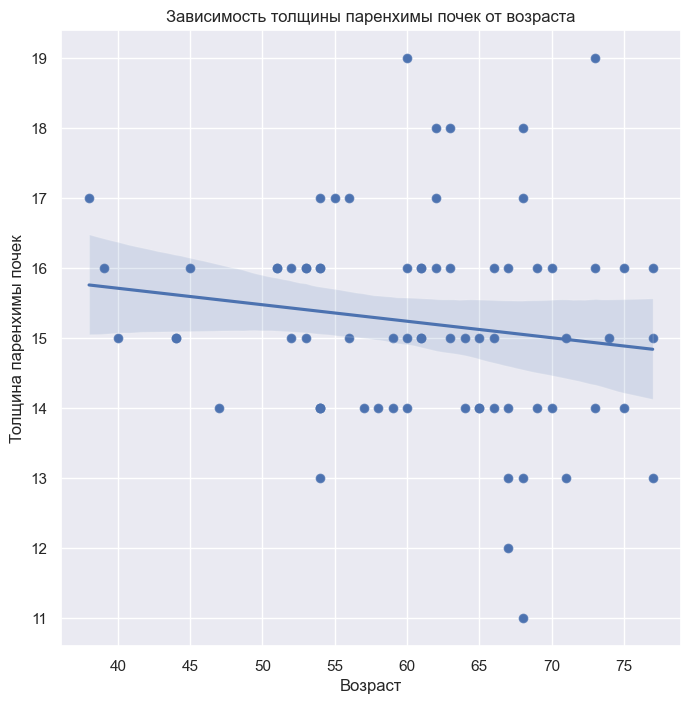

Коэффициент корреляции: -0.14607388681920233


In [149]:
df = data[data['хбп'] == 'Пациенты без ХБП']
sns.scatterplot(x='возраст', y='толщина_паренхимы_почек', data=df)
sns.regplot(x='возраст', y='толщина_паренхимы_почек', data=df)
plt.title('Зависимость толщины паренхимы почек от возраста')
plt.xlabel('Возраст')
plt.ylabel('Толщина паренхимы почек')
plt.show()

correlation = df['возраст'].corr(df['толщина_паренхимы_почек'])
print(f'Коэффициент корреляции: {correlation}')

Коэффициент корреляции: -0.14607388681920233


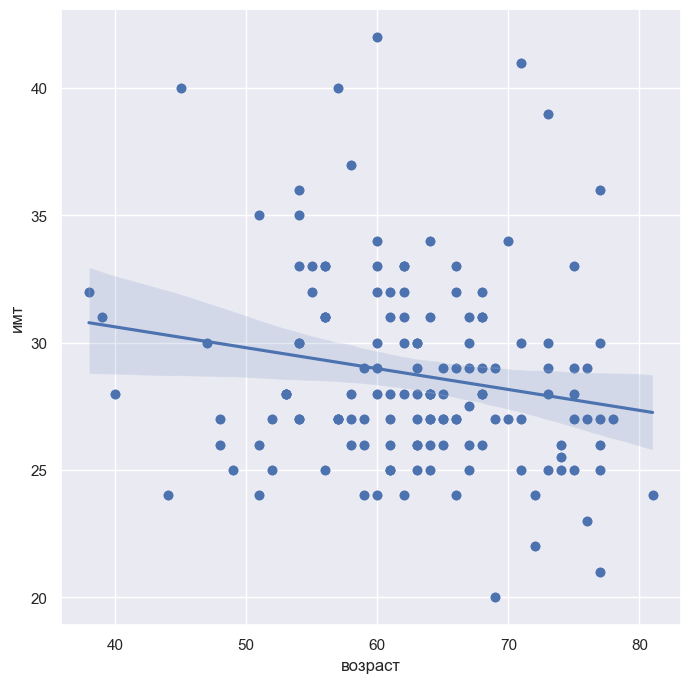

In [150]:
data = data.loc[data['пол'] == 1]
plt.scatter(data['возраст'], data['имт'])
sns.regplot(x='возраст', y='имт', data=data)

correlation = df['возраст'].corr(df['толщина_паренхимы_почек'])
print(f'Коэффициент корреляции: {correlation}')

# Гипотезы

Mann-Whitney U-статистика (с инфарктом миокарда): 260.5
p-значение (с инфарктом миокарда): 0.9569601936143013
Нет статистически значимых различий в возрасте между группами с ОПП и с инфарктом миокарда и без ОПП и с инфарктом миокарда
Mann-Whitney U-статистика (без инфаркта миокарда): 110.0
p-значение (без инфаркта миокарда): 0.07498123117719836
Нет статистически значимых различий в возрасте между группами с ОПП и без инфаркта миокарда и без ОПП и без инфаркта миокарда


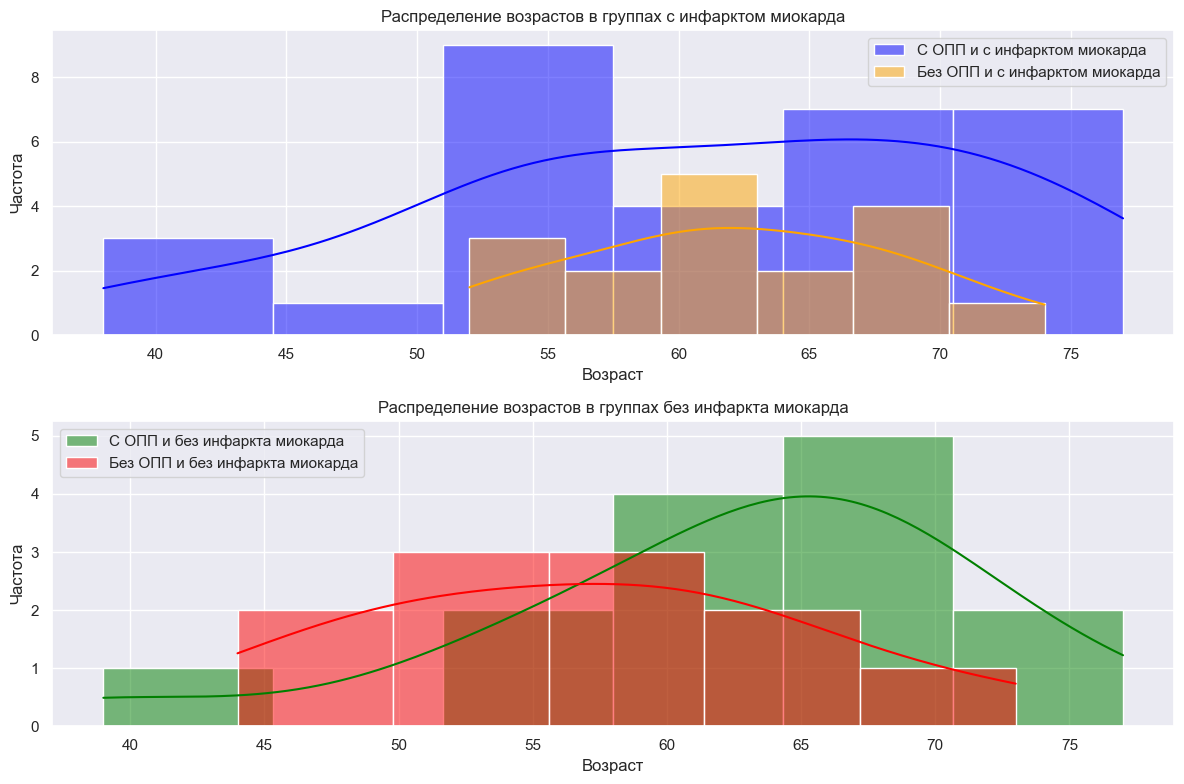

In [151]:
group_with_mi_have_opp = df[(df['развитие_опп'] == 'есть') & (df['инфаркт_миокарда'] == 1)]['возраст']
group_with_mi_no_opp = df[(df['развитие_опп'] == 'нет') & (df['инфаркт_миокарда'] == 1)]['возраст']

group_no_mi_have_opp = df[(df['развитие_опп'] == 'есть') & (df['инфаркт_миокарда'] == 0)]['возраст']
group_no_mi_no_opp = df[(df['развитие_опп'] == 'нет') & (df['инфаркт_миокарда'] == 0)]['возраст']

# Проведение теста Манна-Уитни для групп с инфарктом миокарда
statistic_mi, p_value_mi = mannwhitneyu(group_with_mi_have_opp, group_with_mi_no_opp)

# Визуализация распределений возрастов в двух группах с инфарктом миокарда
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(group_with_mi_have_opp, color='blue', label='С ОПП и с инфарктом миокарда', kde=True)
sns.histplot(group_with_mi_no_opp, color='orange', label='Без ОПП и с инфарктом миокарда', kde=True)
plt.title('Распределение возрастов в группах с инфарктом миокарда')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()

# Вывод результатов теста
print(f'Mann-Whitney U-статистика (с инфарктом миокарда): {statistic_mi}')
print(f'p-значение (с инфарктом миокарда): {p_value_mi}')

# Оценка статистической значимости результатов для групп с инфарктом миокарда
alpha = 0.05
if p_value_mi < alpha:
    print('Различия в возрасте статистически значимы между группами с ОПП и с инфарктом миокарда и без ОПП и с инфарктом миокарда')
else:
    print('Нет статистически значимых различий в возрасте между группами с ОПП и с инфарктом миокарда и без ОПП и с инфарктом миокарда')

# Визуализация распределений возрастов в двух группах без инфаркта миокарда
plt.subplot(2, 1, 2)
sns.histplot(group_no_mi_have_opp, color='green', label='С ОПП и без инфаркта миокарда', kde=True)
sns.histplot(group_no_mi_no_opp, color='red', label='Без ОПП и без инфаркта миокарда', kde=True)
plt.title('Распределение возрастов в группах без инфаркта миокарда')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()

# Проведение теста Манна-Уитни для групп без инфаркта миокарда
statistic_no_mi, p_value_no_mi = mannwhitneyu(group_no_mi_have_opp, group_no_mi_no_opp)

# Вывод результатов теста
print(f'Mann-Whitney U-статистика (без инфаркта миокарда): {statistic_no_mi}')
print(f'p-значение (без инфаркта миокарда): {p_value_no_mi}')

# Оценка статистической значимости результатов для групп без инфаркта миокарда
if p_value_no_mi < alpha:
    print('Различия в возрасте статистически значимы между группами с ОПП и без инфаркта миокарда и без ОПП и без инфаркта миокарда')
else:
    print('Нет статистически значимых различий в возрасте между группами с ОПП и без инфаркта миокарда и без ОПП и без инфаркта миокарда')

plt.tight_layout()
plt.show()

Mann-Whitney U-статистика (с диабетом): 49.0
p-значение (с диабетом): 0.06384593523304241
Нет статистически значимых различий в возрасте между группами с ОПП и с диабетом и без ОПП и с диабетом
Mann-Whitney U-статистика (без диабета): 341.0
p-значение (без диабета): 0.747084172775529
Нет статистически значимых различий в возрасте между группами с ОПП и без диабета и без ОПП и без диабета


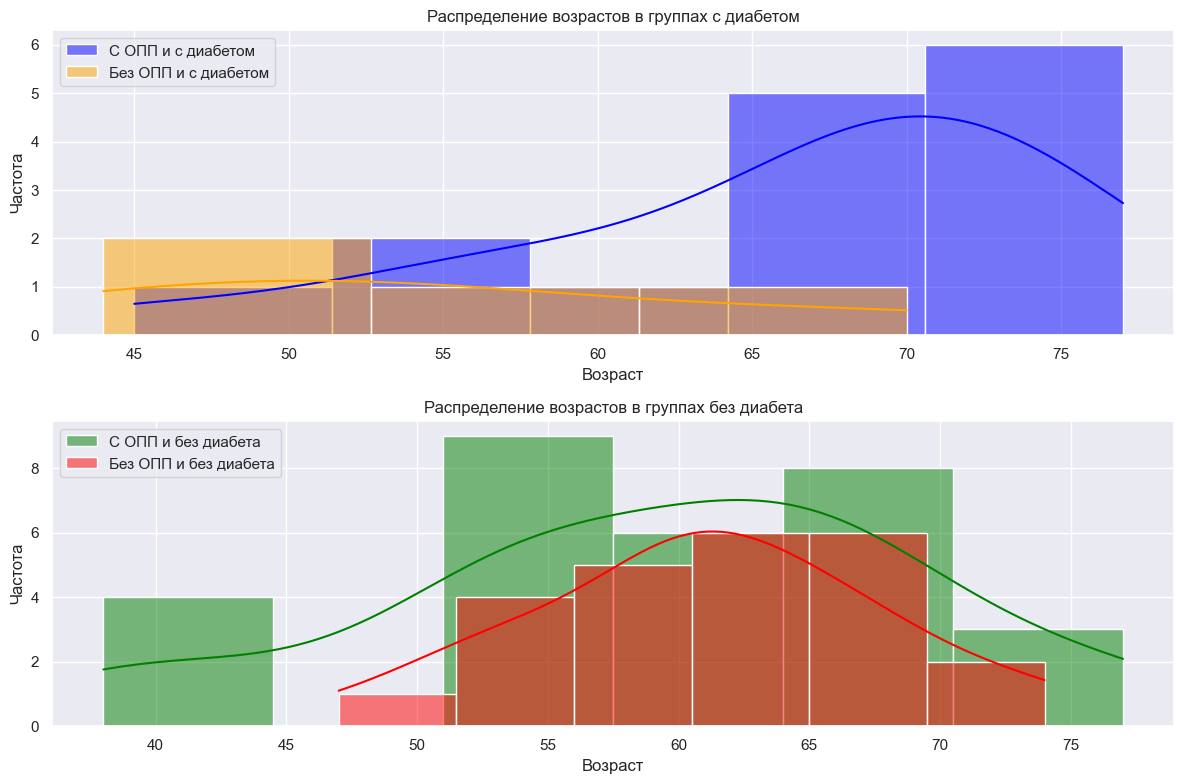

In [152]:
group_with_diabetes_have_opp = df[(df['развитие_опп'] == 'есть') & (df['сахарный_диабет'] == 1)]['возраст']
group_with_diabetes_no_opp = df[(df['развитие_опп'] == 'нет') & (df['сахарный_диабет'] == 1)]['возраст']

group_no_diabetes_have_opp = df[(df['развитие_опп'] == 'есть') & (df['сахарный_диабет'] == 0)]['возраст']
group_no_diabetes_no_opp = df[(df['развитие_опп'] == 'нет') & (df['сахарный_диабет'] == 0)]['возраст']

# Проведение теста Манна-Уитни для групп с сахарным диабетом
statistic_diabetes, p_value_diabetes = mannwhitneyu(group_with_diabetes_have_opp, group_with_diabetes_no_opp)

# Проведение теста Манна-Уитни для групп без сахарного диабета
statistic_no_diabetes, p_value_no_diabetes = mannwhitneyu(group_no_diabetes_have_opp, group_no_diabetes_no_opp)

plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(group_with_diabetes_have_opp, color='blue', label='С ОПП и с диабетом', kde=True)
sns.histplot(group_with_diabetes_no_opp, color='orange', label='Без ОПП и с диабетом', kde=True)
plt.title('Распределение возрастов в группах с диабетом')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()

# Проведение теста Манна-Уитни для групп с диабетом
statistic_diabetes, p_value_diabetes = mannwhitneyu(group_with_diabetes_have_opp, group_with_diabetes_no_opp)

# Вывод результатов теста
print(f'Mann-Whitney U-статистика (с диабетом): {statistic_diabetes}')
print(f'p-значение (с диабетом): {p_value_diabetes}')

# Оценка статистической значимости результатов для групп с диабетом
alpha = 0.05
if p_value_diabetes < alpha:
    print('Различия в возрасте статистически значимы между группами с ОПП и с диабетом и без ОПП и с диабетом')
else:
    print('Нет статистически значимых различий в возрасте между группами с ОПП и с диабетом и без ОПП и с диабетом')

# Визуализация распределений возрастов в двух группах без диабета
plt.subplot(2, 1, 2)
sns.histplot(group_no_diabetes_have_opp, color='green', label='С ОПП и без диабета', kde=True)
sns.histplot(group_no_diabetes_no_opp, color='red', label='Без ОПП и без диабета', kde=True)
plt.title('Распределение возрастов в группах без диабета')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()

# Проведение теста Манна-Уитни для групп без диабета
statistic_no_diabetes, p_value_no_diabetes = mannwhitneyu(group_no_diabetes_have_opp, group_no_diabetes_no_opp)

# Вывод результатов теста
print(f'Mann-Whitney U-статистика (без диабета): {statistic_no_diabetes}')
print(f'p-значение (без диабета): {p_value_no_diabetes}')

# Оценка статистической значимости результатов для групп без диабета
if p_value_no_diabetes < alpha:
    print('Различия в возрасте статистически значимы между группами с ОПП и без диабета и без ОПП и без диабета')
else:
    print('Нет статистически значимых различий в возрасте между группами с ОПП и без диабета и без ОПП и без диабета')

plt.tight_layout()
plt.show()

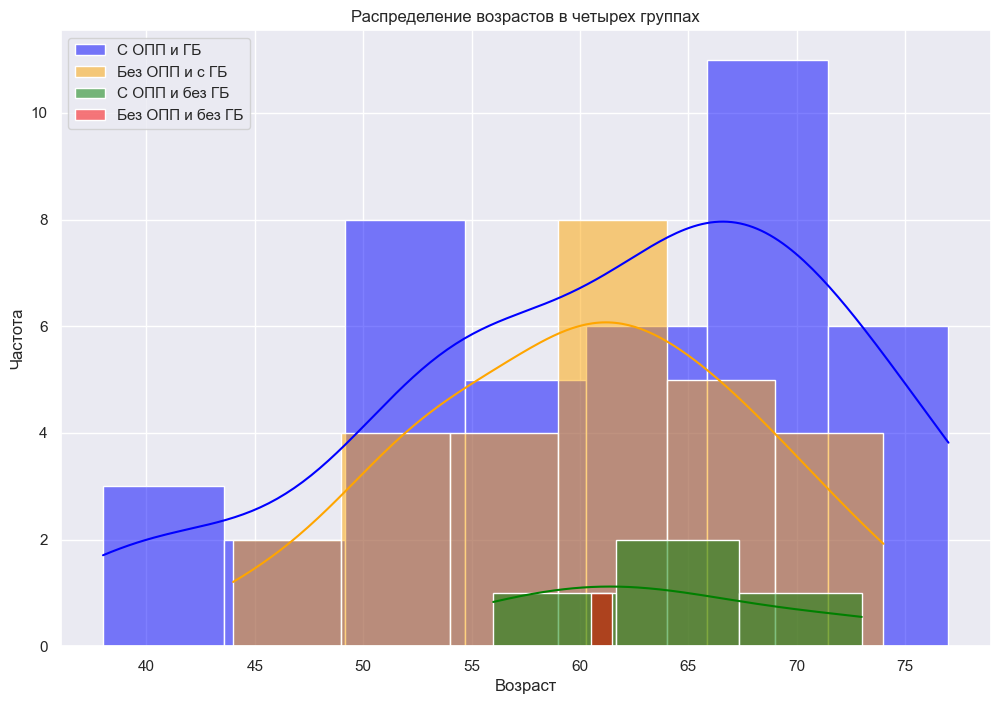

Mann-Whitney U-статистика (с ГБ): 625.0
p-значение (с ГБ): 0.3729704271253247
Mann-Whitney U-статистика (без ГБ): 3.0
p-значение (без ГБ): 0.8
Нет статистически значимых различий в возрасте между группами с ОПП и ГБ и без ОПП и с ГБ
Нет статистически значимых различий в возрасте между группами с ОПП и без ГБ и без ОПП и без ГБ


In [153]:
group_with_gb_have_opp = df[(df['развитие_опп'] == 'есть') & (df['гб'] == 1)]['возраст']
group_with_gb_no_opp = df[(df['развитие_опп'] == 'нет') & (df['гб'] == 1)]['возраст']

group_no_gb_have_opp = df[(df['развитие_опп'] == 'есть') & (df['гб'] == 0)]['возраст']
group_no_gb_no_opp = df[(df['развитие_опп'] == 'нет') & (df['гб'] == 0)]['возраст']

# Проведение теста Манна-Уитни для групп с ГБ
statistic_gb, p_value_gb = mannwhitneyu(group_with_gb_have_opp, group_with_gb_no_opp)

# Проведение теста Манна-Уитни для групп без ГБ
statistic_no_gb, p_value_no_gb = mannwhitneyu(group_no_gb_have_opp, group_no_gb_no_opp)

# Визуализация распределений возрастов в четырех группах
plt.figure(figsize=(12, 8))
sns.histplot(group_with_gb_have_opp, color='blue', label='С ОПП и ГБ', kde=True)
sns.histplot(group_with_gb_no_opp, color='orange', label='Без ОПП и с ГБ', kde=True)
sns.histplot(group_no_gb_have_opp, color='green', label='С ОПП и без ГБ', kde=True)
sns.histplot(group_no_gb_no_opp, color='red', label='Без ОПП и без ГБ', kde=True)
plt.title('Распределение возрастов в четырех группах')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Вывод результатов тестов
print(f'Mann-Whitney U-статистика (с ГБ): {statistic_gb}')
print(f'p-значение (с ГБ): {p_value_gb}')
print(f'Mann-Whitney U-статистика (без ГБ): {statistic_no_gb}')
print(f'p-значение (без ГБ): {p_value_no_gb}')

# Оценка статистической значимости результатов для групп с ГБ
alpha = 0.05
if p_value_gb < alpha:
    print('Различия в возрасте статистически значимы между группами с ОПП и ГБ и без ОПП и с ГБ')
else:
    print('Нет статистически значимых различий в возрасте между группами с ОПП и ГБ и без ОПП и с ГБ')

# Оценка статистической значимости результатов для групп без ГБ
if p_value_no_gb < alpha:
    print('Различия в возрасте статистически значимы между группами с ОПП и без ГБ и без ОПП и без ГБ')
else:
    print('Нет статистически значимых различий в возрасте между группами с ОПП и без ГБ и без ОПП и без ГБ')

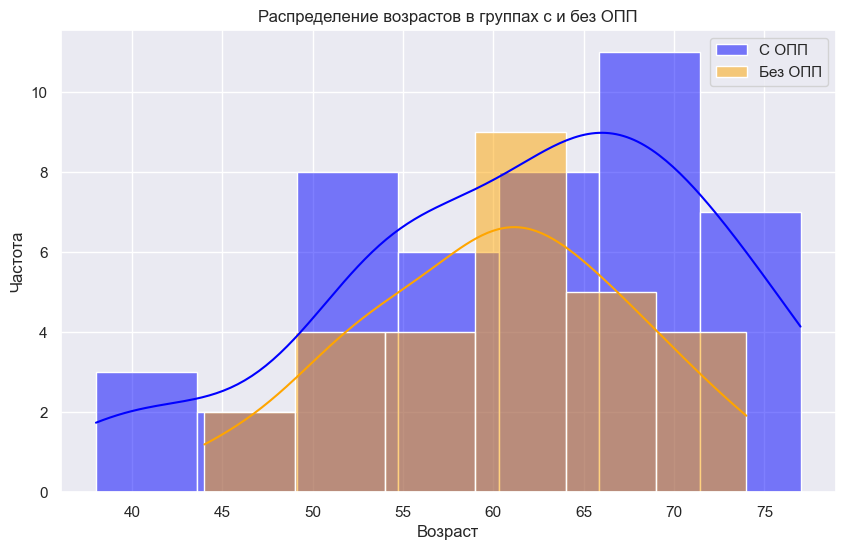

Mann-Whitney U-статистика: 720.0
p-значение: 0.3094420571836777
Нет статистически значимых различий в возрасте между группами с и без ОПП


In [154]:
group_have_opp = df[df['развитие_опп'] == 'есть']['возраст']
group_no_opp = df[df['развитие_опп'] == 'нет']['возраст']

# Проведение теста Манна-Уитни
statistic, p_value = mannwhitneyu(group_have_opp, group_no_opp)

# Визуализация распределений возрастов в двух группах
plt.figure(figsize=(10, 6))
sns.histplot(group_have_opp, color='blue', label='С ОПП', kde=True)
sns.histplot(group_no_opp, color='orange', label='Без ОПП', kde=True)
plt.title('Распределение возрастов в группах с и без ОПП')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Вывод результатов теста
print(f'Mann-Whitney U-статистика: {statistic}')
print(f'p-значение: {p_value}')

# Оценка статистической значимости результата
alpha = 0.05
if p_value < alpha:
    print('Различия в возрасте статистически значимы между группами с и без ОПП')
else:
    print('Нет статистически значимых различий в возрасте между группами с и без ОПП')

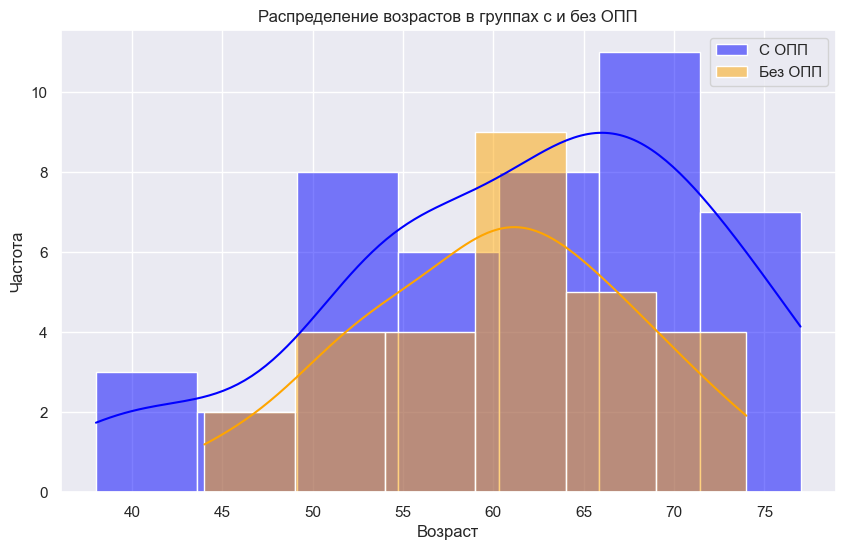

Mann-Whitney U-статистика: 720.0
p-значение: 0.3094420571836777
Нет статистически значимых различий в возрасте между группами с и без ОПП


In [155]:
group_have_opp = df[df['развитие_опп'] == 'есть']['возраст']
group_no_opp = df[df['развитие_опп'] == 'нет']['возраст']

# Проведение теста Манна-Уитни
statistic, p_value = mannwhitneyu(group_have_opp, group_no_opp)

# Визуализация распределений возрастов в двух группах
plt.figure(figsize=(10, 6))
sns.histplot(group_have_opp, color='blue', label='С ОПП', kde=True)
sns.histplot(group_no_opp, color='orange', label='Без ОПП', kde=True)
plt.title('Распределение возрастов в группах с и без ОПП')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()
plt.show()

# Вывод результатов теста
print(f'Mann-Whitney U-статистика: {statistic}')
print(f'p-значение: {p_value}')

# Оценка статистической значимости результата
alpha = 0.05
if p_value < alpha:
    print('Различия в возрасте статистически значимы между группами с и без ОПП')
else:
    print('Нет статистически значимых различий в возрасте между группами с и без ОПП')

Mann-Whitney U-статистика (АР): 377.5
p-значение (АР): 0.22669034298779966
Нет статистически значимых различий в возрасте между группами с ОПП и АР и без ОПП и АР
Mann-Whitney U-статистика (без АР): 1015.5
p-значение (без АР): 0.6635802326366729
Нет статистически значимых различий в возрасте между группами с ОПП и без АР и без ОПП и без АР


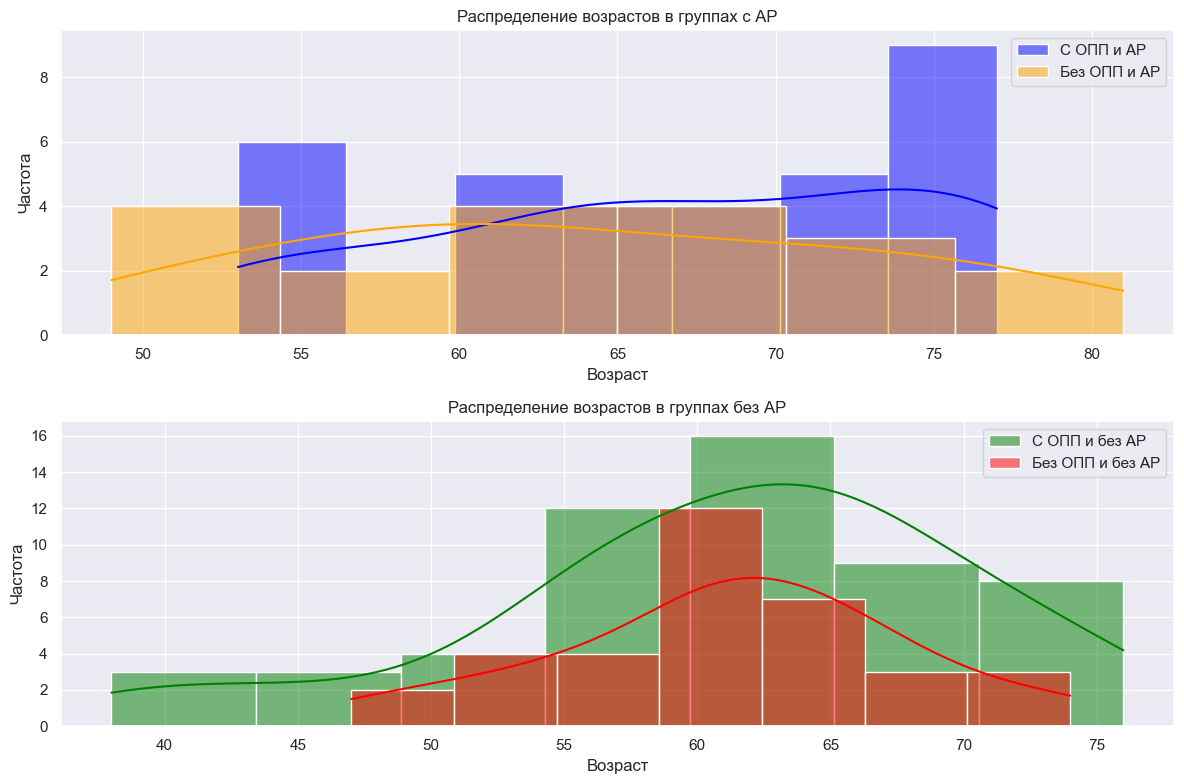

In [156]:
df = data.copy()

group_ar_have_opp = df[(df['развитие_опп'] == 'есть') & (df['ар'] == 1)]['возраст']
group_ar_no_opp = df[(df['развитие_опп'] == 'нет') & (df['ар'] == 1)]['возраст']

group_no_ar_have_opp = df[(df['развитие_опп'] == 'есть') & (df['ар'] == 0)]['возраст']
group_no_ar_no_opp = df[(df['развитие_опп'] == 'нет') & (df['ар'] == 0)]['возраст']

# Проведение теста Манна-Уитни для групп с АР
statistic_ar, p_value_ar = mannwhitneyu(group_ar_have_opp, group_ar_no_opp)

# Визуализация распределений возрастов в двух группах с АР
plt.figure(figsize=(12, 8))
plt.subplot(2, 1, 1)
sns.histplot(group_ar_have_opp, color='blue', label='С ОПП и АР', kde=True)
sns.histplot(group_ar_no_opp, color='orange', label='Без ОПП и АР', kde=True)
plt.title('Распределение возрастов в группах с АР')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()

# Вывод результатов теста
print(f'Mann-Whitney U-статистика (АР): {statistic_ar}')
print(f'p-значение (АР): {p_value_ar}')

# Оценка статистической значимости результатов для групп с АР
alpha = 0.05
if p_value_ar < alpha:
    print('Различия в возрасте статистически значимы между группами с ОПП и АР и без ОПП и АР')
else:
    print('Нет статистически значимых различий в возрасте между группами с ОПП и АР и без ОПП и АР')

# Визуализация распределений возрастов в двух группах без АР
plt.subplot(2, 1, 2)
sns.histplot(group_no_ar_have_opp, color='green', label='С ОПП и без АР', kde=True)
sns.histplot(group_no_ar_no_opp, color='red', label='Без ОПП и без АР', kde=True)
plt.title('Распределение возрастов в группах без АР')
plt.xlabel('Возраст')
plt.ylabel('Частота')
plt.legend()

# Проведение теста Манна-Уитни для групп без АР
statistic_no_ar, p_value_no_ar = mannwhitneyu(group_no_ar_have_opp, group_no_ar_no_opp)

# Вывод результатов теста
print(f'Mann-Whitney U-статистика (без АР): {statistic_no_ar}')
print(f'p-значение (без АР): {p_value_no_ar}')

# Оценка статистической значимости результатов для групп без АР
if p_value_no_ar < alpha:
    print('Различия в возрасте статистически значимы между группами с ОПП и без АР и без ОПП и без АР')
else:
    print('Нет статистически значимых различий в возрасте между группами с ОПП и без АР и без ОПП и без АР')

plt.tight_layout()
plt.show()

# Решение задачи линейной регрессии

[6. 7. 7. 6. 7. 6. 7. 7. 8. 6. 5. 6. 5. 8. 6. 7. 6. 8. 8. 7. 6. 6.]


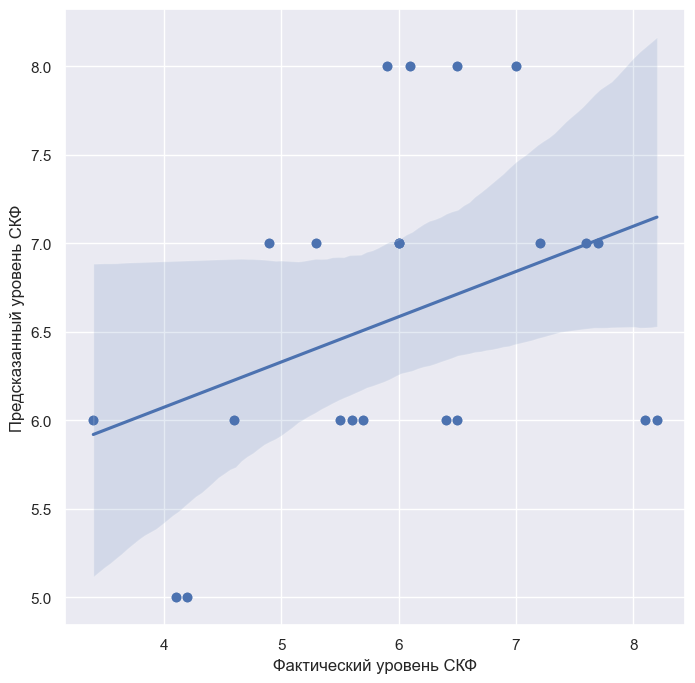

Среднеквадратичная ошибка (MSE): 1.8995454545454542
Коэффициент детерминации (R^2): -0.17458127323598172


In [157]:
categorical_columns = df.select_dtypes(include=['object']).columns

# Преобразование категориальных переменных в числовой формат
df_numeric = pd.get_dummies(df, columns=categorical_columns)

X = data[['креатинин_крови', 'сад', 'скф_расч.']]
y = data['мочевина_']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = np.round(model.predict(X_test))
print(y_pred)

# Визуализация
plt.scatter(y_test, y_pred)
sns.regplot(x=y_test, y=y_pred, data=df)
plt.xlabel("Фактический уровень СКФ")
plt.ylabel("Предсказанный уровень СКФ")
plt.show()

# Оценка качества модели
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Среднеквадратичная ошибка (MSE): {mse}")
print(f"Коэффициент детерминации (R^2): {r2}")